# ISBI 2023: Tutorial on Topological Data Analysis

- Cartagena de Indias, Colombia, April 20, 2023
- 20th IEEE International Symposium on Biomedical Imaging

## [Anass B. El-Yaagoubi](https://cemse.kaust.edu.sa/biostats/people/person/anass-el-yaagoubi-bourakna), Statistics Program, KAUST

The goal of this tutorial is to provide an introduction to Python for topological data analysis. We will be presenting the main TDA Python Libraries, that are [Ripser](https://ripser.scikit-tda.org/en/latest/) and [Persim](https://persim.scikit-tda.org/en/latest/). The tutorial will be organized as follows:

- Persistence homology (PH) on point cloud data with persistence diagrams (PDs)
- Wasserstein distance computation between PDs
- Persistence landscapes (PLs)
- Time delay (TDE) and sliding window (SWE) embeddings for time series data
- Application to Epileptic seizures data set

---

This is joint work with Professor Moo K. Chung-1, and Professor Hernando Ombao-2.
1. Department of Biostatistics & Medical Informatics, University of Wisconsin-Madison
2. Biostatistics Group, CEMSE, King Abdullah University of Science and Technology

### Part 0 - Python dependencies

In this tutorial, we will be using [Scikit-TDA](https://scikit-tda.org/), which is a Python project for topological data analysis. Scikit-TDA is a user-friendly project that makes TDA seem very easy. We will need to install the [Ripser](https://ripser.scikit-tda.org/en/latest/) and [Persim](https://persim.scikit-tda.org/en/latest/) libraries, which will be the backbone of our code. However, Scikit-TDA has multiple other TDA libraries that can also be very useful.

Content of Scikit-TDA:
- Ripser (Homology package - C++)
- Persim (PD, PL and PI. Distances)
- TaDAsets (n-spheres, torus, swiss rolls)
- Kepler Mapper (Mapper algorithm)
- CechMate (Alpha, Rips and Cech filtrations)

### Part 0.1 -  Installing Ripser
- Instalation:
    - pip install ripser
- Documentation:
    - https://pypi.org/project/ripser/

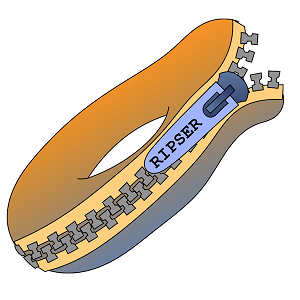

### Part 0.2 -  Installing Persim
- Instalation:
    - pip install persim
- Documentation:
    - https://pypi.org/project/persim/

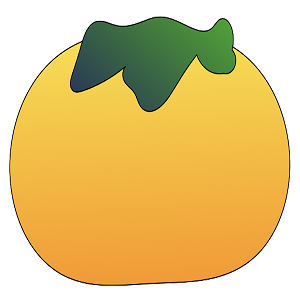

### Part 0.3 -  Installing TaDAsets
- Instalation:
    - pip install tadasets
- Documentation:
    - https://pypi.org/project/tadasets/

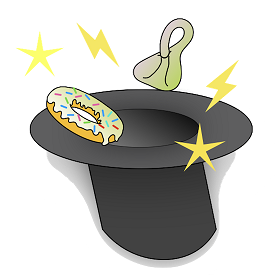

### Part 1 - Introduction with examples

In [1]:
##### Basic but very useful libraries #####
###########################################
import numpy as np                 # For handling arrays
import matplotlib.pyplot as plt    # For visualization
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
import warnings
warnings.filterwarnings('ignore')

##### Main TDA libraries #####
##############################
# pip install ripser
from ripser import ripser          # For computing persistence cohomology
# pip install persim
import persim                      # For handling and visualizing persistence diagrams
from persim import landscapes
# pip install tadasets
from tadasets import sphere, torus # For generating simple but interesting datasets

### Part 1.1 - Sphere example

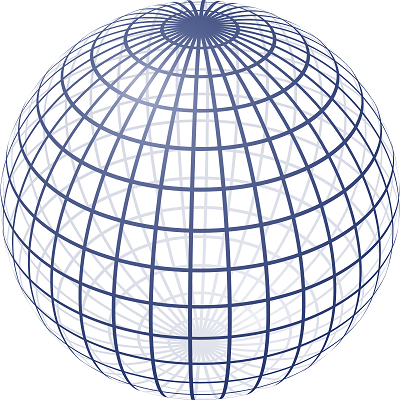

In [2]:
n = 100 # number of points
r = 1   # Sphere radius

# Generates points on a spherical manifold
dataset_sphere = sphere(n=n, r=r)

In [3]:
mpl.rcParams.update(mpl.rcParamsDefault)

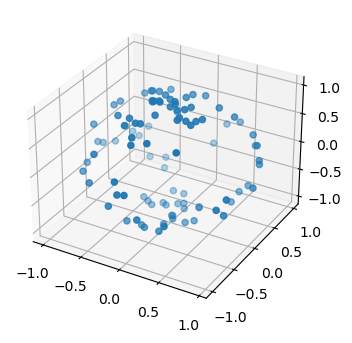

In [4]:
# Creates a x by y inches figure
fg = plt.figure(figsize=(4, 4))
# Creates a 2D projection from 3D data
ax = fg.add_subplot(111, projection='3d')
# Scatter plot of our data
ax.scatter(
    dataset_sphere[:, 0], 
    dataset_sphere[:, 1], 
    dataset_sphere[:, 2])
plt.show()

In [6]:
# To build persistence diagrams:
# X: A cloud of points or a distance matrix
# maxdim: Maximum dimension of topological features to be considered
tda_sphere = ripser(X=dataset_sphere, maxdim=2)
print(tda_sphere.keys())

dict_keys(['dgms', 'cocycles', 'num_edges', 'dperm2all', 'idx_perm', 'r_cover'])


In [7]:
diagrams_sphere = tda_sphere['dgms']
print("Number of dimensions: ", len(diagrams_sphere))
print()
print("2D-Features: ", diagrams_sphere[2])
print()
print("1D-Features: ", diagrams_sphere[1][:5])

Number of dimensions:  3

2D-Features:  [[1.1112721  1.66477072]]

1D-Features:  [[0.92940563 1.03308535]
 [0.73170447 0.77624667]
 [0.62380236 0.78820878]
 [0.62368715 0.72449607]
 [0.62334728 0.8442055 ]]


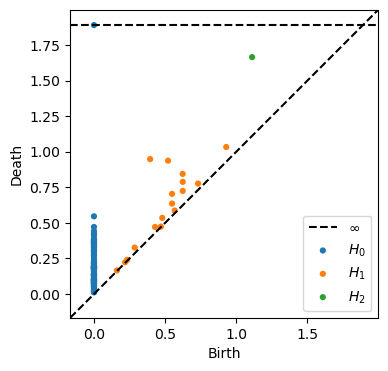

In [8]:
plt.figure(figsize=(4, 4))

# Plots the persistence diagram for all dimensions
persim.plot_diagrams(diagrams_sphere)
plt.show()

### Part 1.2 - Torus example

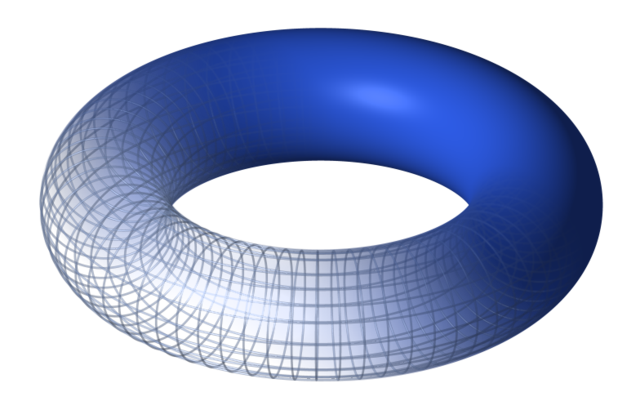

In [9]:
n = 300 # number of points
a = 2   # small radius
c = 5   # big radius

# Generates points on a torus
dataset_torus_clean = torus(n=n, a=a, c=c, noise=0)  # without noise
dataset_torus_noise = torus(n=n, a=a, c=c, noise=.1) # with noise

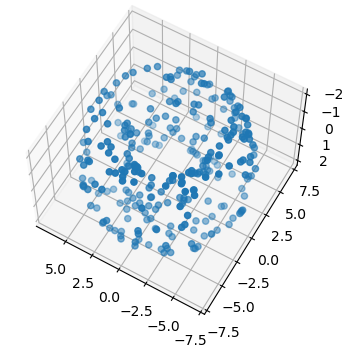

In [10]:
# Creates a x by y inches figure
fg = plt.figure(figsize=(4, 4))
# Creates a 2D projection from 3D data
ax = fg.add_subplot(111, projection='3d')
# Scatter plot of our data
ax.scatter(
    dataset_torus_clean[:, 0], 
    dataset_torus_clean[:, 1], 
    dataset_torus_clean[:, 2])
ax.view_init(-120, 60)
plt.show()

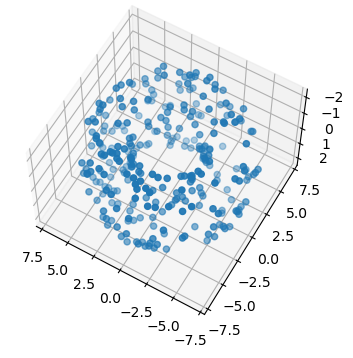

In [11]:
# Creates a x by y inches figure
fg = plt.figure(figsize=(4, 4))
# Creates a 2D projection from 3D data
ax = fg.add_subplot(111, projection='3d')
# Scatter plot of our data
ax.scatter(
    dataset_torus_noise[:, 0], 
    dataset_torus_noise[:, 1], 
    dataset_torus_noise[:, 2])
ax.view_init(-120, 60)
plt.show()

In [12]:
tda_torus_clean = ripser(X=dataset_torus_clean, maxdim=2)
tda_torus_noise = ripser(X=dataset_torus_noise, maxdim=2)

diagrams_torus_clean = tda_torus_clean['dgms']
diagrams_torus_noise = tda_torus_noise['dgms']

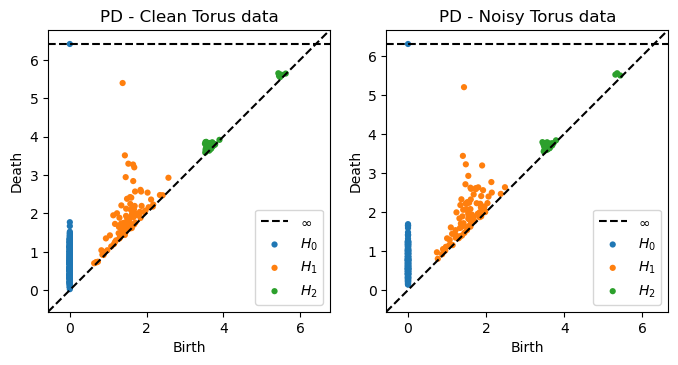

In [13]:
plt.figure(figsize=(8, 5))

plt.subplot(121)
plt.title('PD - Clean Torus data')
persim.plot_diagrams(diagrams_torus_clean)
plt.subplot(122)
plt.title('PD - Noisy Torus data')
persim.plot_diagrams(diagrams_torus_noise)

plt.show()

### Part 2 - Distance between PDs

In order to carry on statistical inference on top of TDA, it is necessary to compute distances between PDs from different populations. To do so, we usually rely on Bottleneck and Wasserstein distances. In this part of the tutorial, we briefly present how to compute these distances in Python with the help of the Persim library. However, more details regarding the computational aspect of these distance functions will be given in the following tutorial by Professor Soheil Kolouri.

### Part 2.1 - Wasserstein distance in Python

Let us consider first the Wasserstein distance based on the $L_P$ norm:
<center> $W_p(A, B) = \underset{\gamma:A \twoheadrightarrow B}{\inf} \hspace{5mm} \Bigg( \sum_{x \in A} \big|\big| x-\gamma(x) \big|\big|_2^p \Bigg)^\frac{1}{p}$ </center>

In [14]:
# Computes the Wasserstein distance - clean with clean
WD_dim_1_CC = persim.wasserstein(
    diagrams_torus_clean[1], 
    diagrams_torus_clean[1], 
    matching=False)

# Computes the Wasserstein distance - clean with noisy
WD_dim_1_CN = persim.wasserstein(
    diagrams_torus_clean[1], 
    diagrams_torus_noise[1], 
    matching=False)

print('The 1-Dim diagram Wasserstein distance for C-C is: {:.3f}'.format(WD_dim_1_CC))
print('The 1-Dim diagram Wasserstein distance for C-N is: {:.3f}'.format(WD_dim_1_CN))

The 1-Dim diagram Wasserstein distance for C-C is: 0.000
The 1-Dim diagram Wasserstein distance for C-N is: 7.819


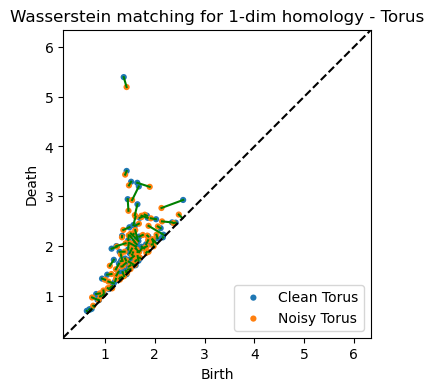

In [15]:
_, matching = persim.wasserstein( # Computes the Wasserstein distance
    diagrams_torus_clean[1],      # Retuns the matching of the points
    diagrams_torus_noise[1], 
    matching=True)

plt.figure(figsize=(6, 4))
persim.wasserstein_matching(
    diagrams_torus_clean[1], 
    diagrams_torus_noise[1], 
    matching=matching, 
    labels=['Clean Torus', 'Noisy Torus'])

plt.title('Wasserstein matching for 1-dim homology - Torus')
plt.show()

### Part 2.2 - Bottelneck distance in Python

Let us consider first the Bottelneck distance:
<center> $W_\infty(A, B) = \underset{\gamma:A \twoheadrightarrow B}{\inf} \hspace{1mm} \underset{x \in A}{sup} \hspace{2mm} \big|\big| x-\gamma(x) \big|\big|_2$ </center>

In [16]:
# Computes the Bottleneck distance - clean with clean
BD_dim_1_CC = persim.bottleneck(
    diagrams_torus_clean[1], 
    diagrams_torus_clean[1], 
    matching=False)

# Computes the Bottleneck distance - clean with noisy
BD_dim_1_CN = persim.bottleneck(
    diagrams_torus_clean[1], 
    diagrams_torus_noise[1], 
    matching=False)

print('The 1-Dim diagram bottleneck distance for C-C is: {:.3f}'.format(BD_dim_1_CC))
print('The 1-Dim diagram bottleneck distance for C-N is: {:.3f}'.format(BD_dim_1_CN))

The 1-Dim diagram bottleneck distance for C-C is: 0.000
The 1-Dim diagram bottleneck distance for C-N is: 0.274


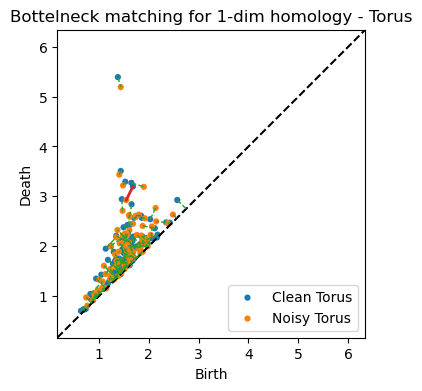

In [17]:
_, matching = persim.bottleneck( # Computes the Bottleneck distance
    diagrams_torus_clean[1],     # Retuns the matching of the points
    diagrams_torus_noise[1], 
    matching=True)

plt.figure(figsize=(6, 4))
persim.bottleneck_matching(
    diagrams_torus_clean[1], 
    diagrams_torus_noise[1], 
    matching=matching, 
    labels=['Clean Torus', 'Noisy Torus'])
plt.title('Bottelneck matching for 1-dim homology - Torus')
plt.show()

### Part 3 - Persistence homology and topological summaries

Computing exactly the previous distance functions between persistence diagrams can get computationally prohibitive as the number of elements in the diagram increases. For this reason, researchers in TDA have proposed other alternatives to the persistence diagrams (such as persistence landscapes and images) to represent the data's topological features (birth-death pairs).

### Part 3.1 - Topological features: birth-death pairs representations

In order to analyze the topological features present in the data, a good topological summary must encode all the topological information in a computationally efficient manner.

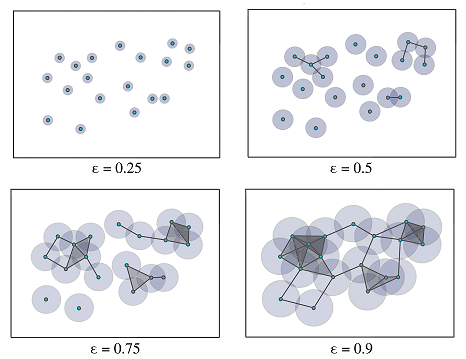

### Part 3.2 - From persistence diagram to persistence landscape

The most famous examples of topological summaries are the following. The persistence diagram (A) that we mentioned previously, where the birth-death pairs were represented in a 2-D coordinate system. The persistence barcode (B), where the birth-death pairs are represented as line segments. The persistence landscape (C), where the persistence diagram representation is transformed to become a set of real-valued functions.

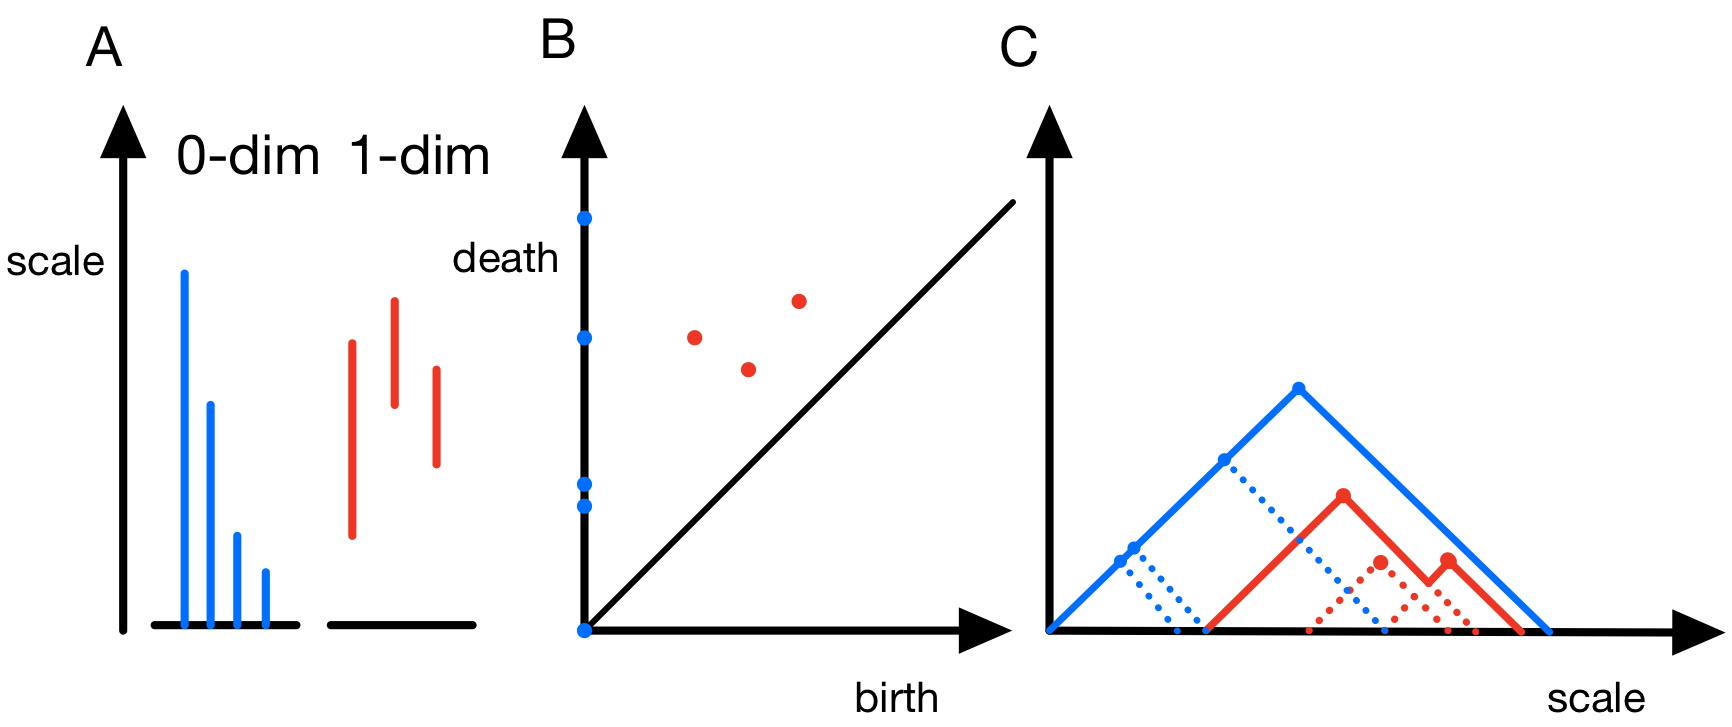

In [18]:
start = 0
stop = 6
num_steps = 200
x_scale = np.linspace(start, stop, num_steps)

# Will be used to build 1D landscapes
pl_1_builder = landscapes.PersistenceLandscaper(
    hom_deg=1,           # Dimension of the features in the PD
    start=start,         # Starting scale (landscape support)
    stop=stop,           # Stoping scale (landscape support)
    num_steps=num_steps, # Scale resolution resolution
    flatten=True)        # To return one landscape curve

# Will be used to build 2D landscapes
pl_2_builder = landscapes.PersistenceLandscaper(
    hom_deg=2,           # Dimension of the features in the PD
    start=start,         # Starting scale (landscape support)
    stop=stop,           # Stoping scale (landscape support)
    num_steps=num_steps, # Scale resolution resolution
    flatten=True)        # To return one landscape curve

In [19]:
# 1D Homology
pl_1_torus = pl_1_builder.fit_transform(diagrams_torus_clean) 
pl_1_spher = pl_1_builder.fit_transform(diagrams_sphere)

# To reshape the landscape curve into multiple layers
pl_1_torus = np.reshape(pl_1_torus, (num_steps, len(pl_1_torus)//num_steps), order='F')
pl_1_spher = np.reshape(pl_1_spher, (num_steps, len(pl_1_spher)//num_steps), order='F')

# 2D Homology
pl_2_torus = pl_2_builder.fit_transform(diagrams_torus_clean)
pl_2_spher = pl_2_builder.fit_transform(diagrams_sphere)

# To reshape the landscape curve into multiple layers
pl_2_torus = np.reshape(pl_2_torus, (num_steps, len(pl_2_torus)//num_steps), order='F')
pl_2_spher = np.reshape(pl_2_spher, (num_steps, len(pl_2_spher)//num_steps), order='F')

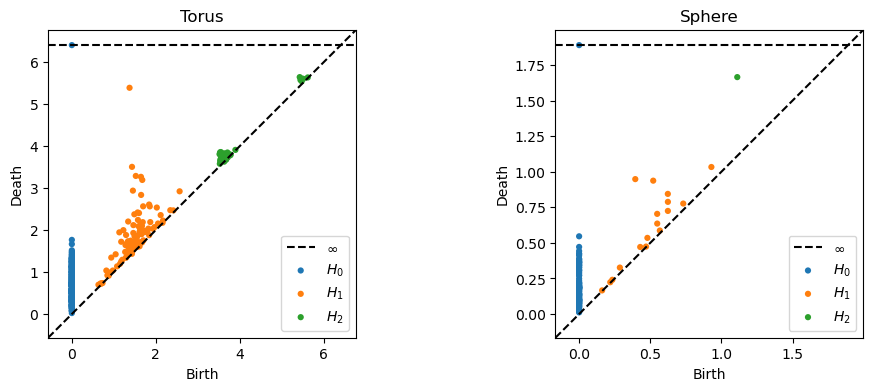

In [20]:
fg = plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.title('Torus')
persim.plot_diagrams(diagrams_torus_clean)

plt.subplot(122)
plt.title('Sphere')
persim.plot_diagrams(diagrams_sphere)

plt.show()

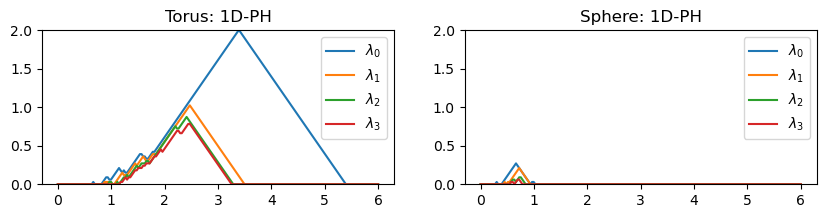

In [21]:
fg = plt.figure(figsize=(10, 2))
plt.subplot(121)
plt.title('Torus: 1D-PH')
plt.ylim([0, 2])
plt.plot(x_scale, pl_1_torus[:, :4]) # Plots the first K layers of the PL
plt.legend(('$\lambda_0$', '$\lambda_1$', '$\lambda_2$', '$\lambda_3$'))

plt.subplot(122)
plt.title('Sphere: 1D-PH')
x_lim = 50
plt.ylim([0, 2])
plt.plot(x_scale, pl_1_spher[:, :4]) # Plots the first K layers of the PL
plt.legend(('$\lambda_0$', '$\lambda_1$', '$\lambda_2$', '$\lambda_3$'))
plt.show()

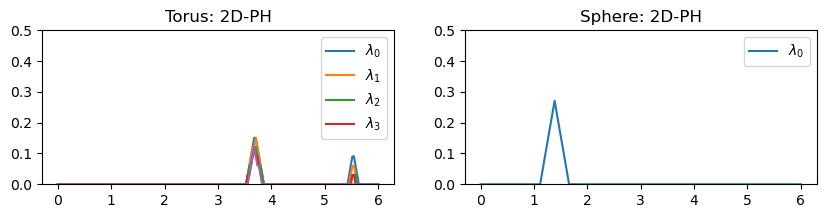

In [22]:
fg = plt.figure(figsize=(10, 2))
plt.subplot(121)
plt.title('Torus: 2D-PH')
plt.ylim([0, .5])
plt.plot(x_scale, pl_2_torus[:, :5]) # Plots the first K layers of the PL
plt.legend(('$\lambda_0$', '$\lambda_1$', '$\lambda_2$', '$\lambda_3$'))

plt.subplot(122)
plt.title('Sphere: 2D-PH')
plt.ylim([0, .5])
plt.plot(x_scale, pl_2_spher[:, :5]) # Plots the first K layers of the PL
plt.legend(('$\lambda_0$', '$\lambda_1$', '$\lambda_2$'))
plt.show()

### Part 4 - TDA for time series data

In practice, we do not always have access to a cloud of point representation, especially while dealing with time series-like data structures. In this case, there are multiple techniques to transform the data into a point cloud representation.

### Part 4.1 - Time delay embedding (TDE)

Such transformations are known as time delay embeddings. Considering a univariate time series, the TDE transformation consists in viewing univariate time series as a set of $K$ time-lagged observed vectors.

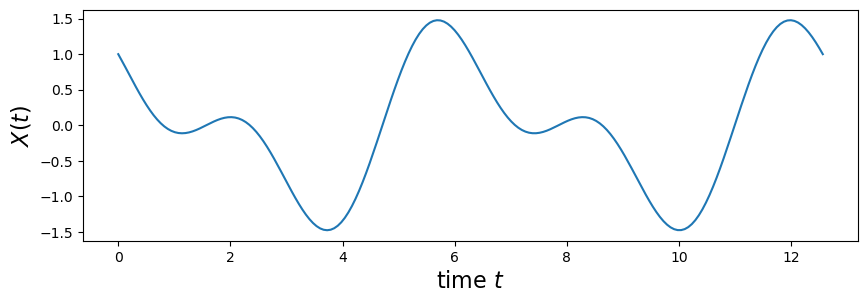

In [23]:
X = np.linspace(0, 4*np.pi, 200)
Y = np.cos(X) - .7*np.sin(2*X)

plt.figure(figsize=(10,3))
plt.plot(X, Y)
plt.xlabel('time $t$', fontsize=16)
plt.ylabel('$X(t)$', fontsize=16)
plt.show()

In [24]:
X1 = Y[100:]
X2 = Y[90:-10]
X3 = Y[80:-20]
X4 = Y[50:-50]
X5 = Y[10:-90]

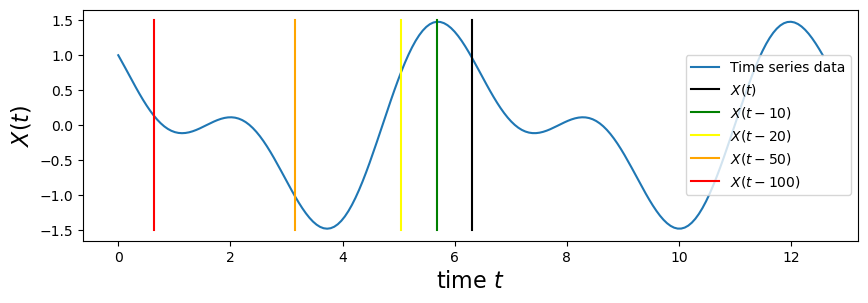

In [25]:
plt.figure(figsize=(10,3))
plt.plot(X, Y)
plt.plot(5 * [X[100]], np.linspace(-1.5, 1.5, 5), 'k')
plt.plot(5 * [X[90]], np.linspace(-1.5, 1.5, 5), 'green')
plt.plot(5 * [X[80]], np.linspace(-1.5, 1.5, 5), 'yellow')
plt.plot(5 * [X[50]], np.linspace(-1.5, 1.5, 5), 'orange')
plt.plot(5 * [X[10]], np.linspace(-1.5, 1.5, 5), 'red')
plt.xlabel('time $t$', fontsize=16)
plt.ylabel('$X(t)$', fontsize=16)
plt.legend(('Time series data', '$X(t)$', '$X(t-10)$', '$X(t-20)$', '$X(t-50)$', '$X(t-100)$'))
plt.show()

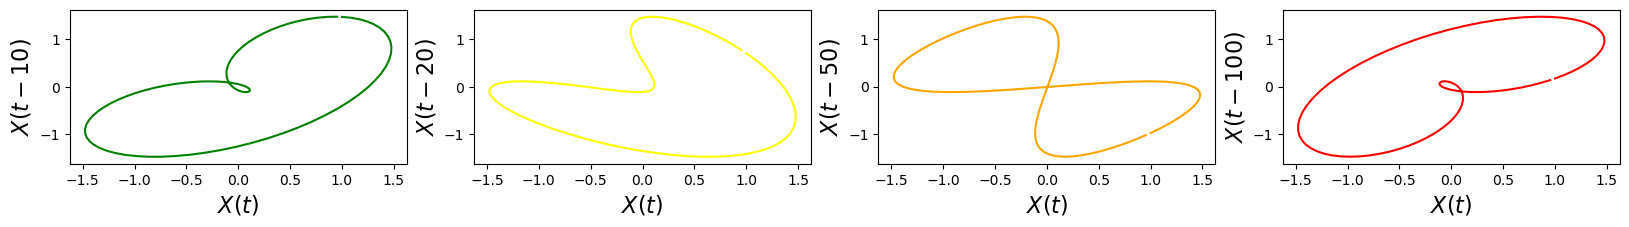

In [26]:
plt.figure(figsize=(20,2))
plt.subplot(141)
plt.plot(X1, X2, 'green')
plt.xlabel('$X(t)$', fontsize=16)
plt.ylabel('$X(t-10)$', fontsize=16)
plt.subplot(142)
plt.plot(X1, X3, 'yellow')
plt.xlabel('$X(t)$', fontsize=16)
plt.ylabel('$X(t-20)$', fontsize=16)
plt.subplot(143)
plt.plot(X1, X4, 'orange')
plt.xlabel('$X(t)$', fontsize=16)
plt.ylabel('$X(t-50)$', fontsize=16)
plt.subplot(144)
plt.plot(X1, X5, 'red')
plt.xlabel('$X(t)$', fontsize=16)
plt.ylabel('$X(t-100)$', fontsize=16)
plt.show()

### Part 4.2 - Taken's embedding theorem in a nutshell

Behind the time delay embedding approach is Taken's embedding theorem, which gives theoretical guarantees regarding phase space reconstruction. In simple words, Taken's embedding theorem states that the phase space trajectory of a system can be reconstructed from a univariate time series through a specific time delay embedding of the form:

$$X(t) = [x(t), x(t-\tau), \dots, x(t-(m-1) \tau)]$$

### Part 4.3 - Example of the Lorenz system

Let us consider the following dynamical system:
$$
    \begin{align*} 
        \dot{x} &= \sigma(y-x), \\
        \dot{y} &= x(\rho-z)-y, \\
        \dot{z} &= xy - \beta z.
    \end{align*}
$$

In [27]:
def lorenz(xyz, *, s=10, r=28, b=2.667):
    """
    Parameters
    ----------
    xyz : array-like, shape (3,)
       Point of interest in three-dimensional space.
    s, r, b : float
       Parameters defining the Lorenz attractor.

    Returns
    -------
    xyz_dot : array, shape (3,)
       Values of the Lorenz attractor's partial derivatives at *xyz*.
    """
    x, y, z = xyz
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return np.array([x_dot, y_dot, z_dot])

In [28]:
dt = 0.01
num_steps = 100000
xyzs = np.empty((num_steps + 1, 3))
xyzs[0] = (0., 1., 1.05)  # Set initial values
for i in range(num_steps):
    xyzs[i + 1] = xyzs[i] + lorenz(xyzs[i]) * dt

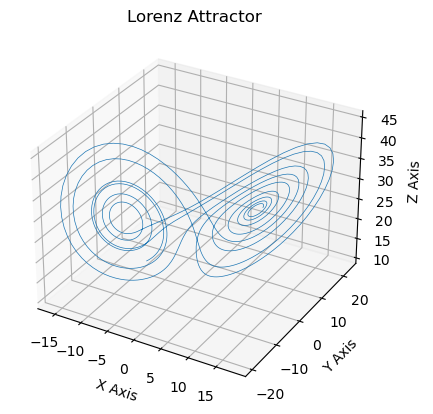

In [29]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(*xyzs[-1000:].T, lw=0.5)
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z Axis")
ax.set_title("Lorenz Attractor")
plt.show()

In [30]:
X_TDE = xyzs[1000:].copy()

X_TDE[500: -500, 1] = X_TDE[500: -500, 0]
X_TDE[1000:, 2]     = X_TDE[1000:, 0]

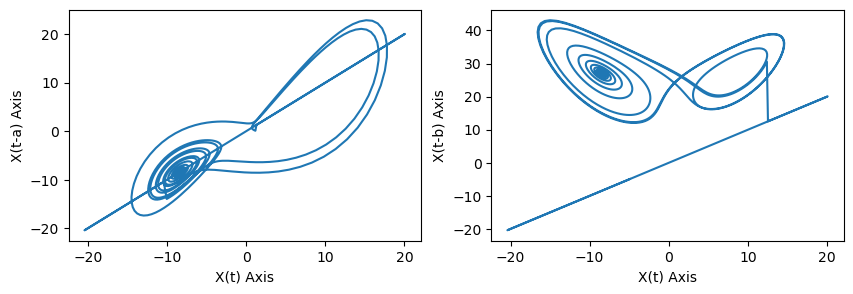

In [31]:
plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.plot(X_TDE[:, 0], X_TDE[:, 1])
plt.xlabel("X(t) Axis")
plt.ylabel("X(t-a) Axis")
plt.subplot(122)
plt.plot(X_TDE[:, 0], X_TDE[:, 2])
plt.xlabel("X(t) Axis")
plt.ylabel("X(t-b) Axis")

plt.show()

### Part 4.4 - Sliding window embedding (SWE)

The previous approach (TDE) usually considers a univariate time series. However, we often have to deal with multivariate time series data in practice. In that case, it has been proposed in the literature to use a moving or sliding window to capture the geometry/topology of the data in a time-localized manner.

<center>
$
\begin{align*}
    x(t) & = [x_1(t), ..., x_p(t)]' &&\in \mathbb{R}^p, \hspace{2mm} t = 1, ..., T \\
    X(t) & = [x(t), x(t-1), ..., x(t-(m-1))] &&\in \mathbb{R}^{p\times m}, \hspace{2mm} t = m, ..., T
\end{align*}
$
</center>

### Part 5 - Application to EEG Epileptic seizure data set

In this case study, we are interested in the dynamics of brain activity before, during, and after an epileptic seizure. We follow the sliding window embedding approach to analyze the EEG signal.

In [32]:
TS = np.array(
    [np.loadtxt('./Epileptic Seizure EEG Dataset/ch{:02d}.inp'.format(i)) for i in range(1, 22) if i not in [11, 12, 20]]
).T
TS -= TS.mean(axis=0)
TS /= TS.std(axis=0)

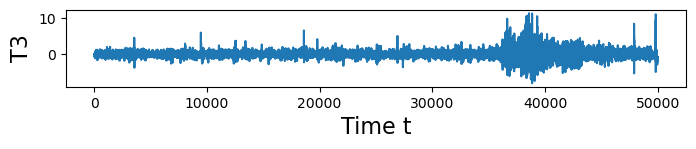

In [33]:
plt.figure(figsize=(8, 1))
plt.plot(TS[:, 12])
plt.ylabel('T3', fontsize=16)
plt.xlabel('Time t', fontsize=16)
plt.show()

### Part 5.1 - Sliding window embedding approach

In this section, we follow the approach proposed by Songdechakraiwut and Chung (2020).
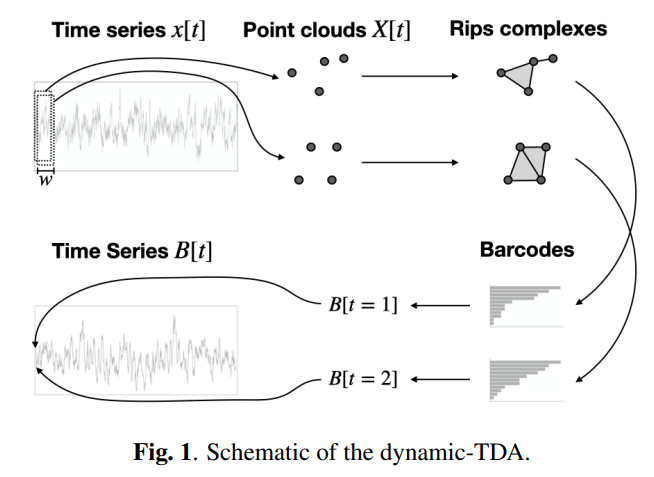

In [34]:
def getTotalPersistence(dgm, dim=0):
    """
    Parameters
    ----------
    dgm : list of arrays
       Each array consists of (birth, death) pairs representing the scales at which a topological features appears.
    dim : int
       Specifies the dimension to be analyzed, i.e., the array on which we compute total persistence.

    Returns
    -------
    total_persistence : float
       The total persistence (sum of death minus birth times) for features of dimension dim.
    """

    total_persistence = 0
    for b, d in dgm[dim]:
        if d != float("inf"): 
            total_persistence += d - b
    
    return total_persistence

In [35]:
T, P = TS.shape
n = 100

TP_0 = []
TP_1 = []
TP_2 = []

for i_s, i_e in zip(range(0, T-n, 100), range(n, T, 100)):
    # Sliding window emedding
    SW_data = TS[i_s:i_e]
    SW_tda = ripser(X=SW_data, maxdim=2)
    SW_diagrams = SW_tda['dgms']
    # Computing total persistence
    total_persistence_0 = getTotalPersistence(SW_diagrams, dim=0)
    total_persistence_1 = getTotalPersistence(SW_diagrams, dim=1)
    total_persistence_2 = getTotalPersistence(SW_diagrams, dim=2)
    # Storing total persistence
    TP_0.append(total_persistence_0)
    TP_1.append(total_persistence_1)
    TP_2.append(total_persistence_2)    

TP_0 = np.array(TP_0)
TP_1 = np.array(TP_1)
TP_2 = np.array(TP_2)

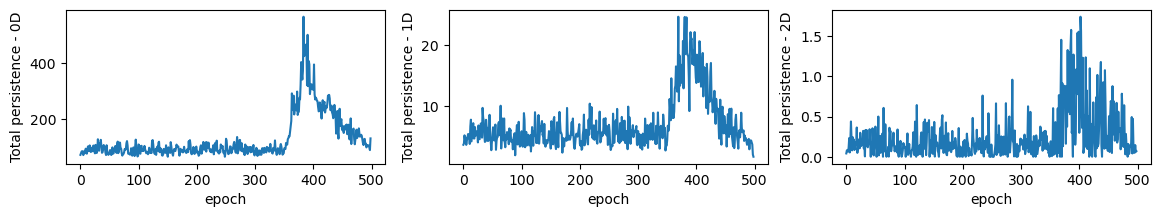

In [36]:
plt.figure(figsize=(14, 2))
plt.subplot(131)
plt.plot(TP_0)
plt.xlabel('epoch')
plt.ylabel('Total persistence - 0D')
plt.subplot(132)
plt.plot(TP_1)
plt.xlabel('epoch')
plt.ylabel('Total persistence - 1D')
plt.subplot(133)
plt.plot(TP_2)
plt.xlabel('epoch')
plt.ylabel('Total persistence - 2D')
plt.show()

### Summary:

- Persistence homology with Rips filtrations using Python
- Computing distances between diagrams
- Building persistence landscapes
- TDE and SWE motivated by Taken's theorem
- Application to Epileptic seizure data

### Keep in mind that there are other TDA approaches for time series data:
- Morse filtration for smooth functions
- Dependence-based TDA

### Future work:

- Study the structural breaks in the mean structure of total persistence
- Develop an inference procedure to assess the significance of structural breaks

### References (TDA - Theory)
- Edelsbrunner et.al. 2002
    - [Topological Persistence and Simplification](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=892133)
- Ghrist 2008
    - [Barcodes: The Persistent Topology of Data](https://www.ams.org/journals/bull/2008-45-01/S0273-0979-07-01191-3/S0273-0979-07-01191-3.pdf)
- Bubenik 2015
    - [Statistical TDA using Persistence Landscapes](https://jmlr.org/papers/v16/bubenik15a.html)
- Songdechakraiwut et.al. 2020
    - [Dynamic TDA for Functional Brain Signals](https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9153431&casa_token=IJjoRTm95XQAAAAA:vaEWmgImJCMsimT4vEdh3svBm8QDVSJhOPdlB3Ssiv7Bjvw_UjYS8jO7U7NAvSoGkqK2x_5krXR2&tag=1)
- El-Yaagoubi et.al. 2022
    - [TDA for Multivariate Time Series Data](https://arxiv.org/pdf/2204.13799.pdf)

### References (TDA - Packages)
- Saul et.al. 2019
    - [Scikit-TDA: Topological Data Analysis for Python](http://doi.org/10.5281/zenodo.2533369)
- Tarlie et.al. 2018
    - [A Lean Persistent Homology Library for Python](https://doi.org/10.21105/joss.00925)
- Bauer Ulrich 2021
    - [Ripser: efficient computation of Vietoris-Rips persistence barcodes](https://doi.org/10.1007/s41468-021-00071-5)
